In [38]:
import numpy as np
import matplotlib.pyplot as plt
from typing import List

In [46]:
def time_client_server(F, u_s, d_min):
    def time_(N: List[int]):
        return [np.max([n * F / u_s, F / d_min]) for n in N]
    return time_

In [47]:
def time_p2p(F, u_s, d_min, u):
    def time_(N: List[int]):
        return [
                np.max([F / u_s, F / d_min, (n * F) / (u_s + u * n)])
                for n in N
                ]
    return time_

In [48]:
kilo, mega, giga = 10**3, 10**6, 10 ** 9

F = 15 * giga
u_s = 30 * mega
d_i = 2 * mega
N = np.array([10, 100, 1000])
u = np.array([300 * kilo, 700 * kilo, 2 * mega])

N_lin = np.linspace(1, 1001, 1000)

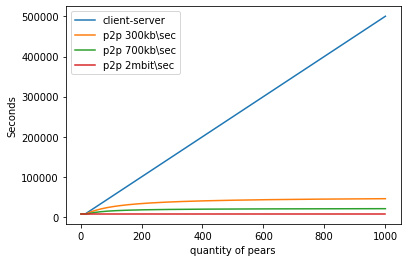

In [65]:
plt.plot(N_lin, time_client_server(F, u_s, d_i)(N_lin), label='client-server')
plt.plot(N_lin, time_p2p(F, u_s, d_i, u[0])(N_lin), label = 'p2p 300kb\sec')
plt.plot(N_lin, time_p2p(F, u_s, d_i, u[1])(N_lin), label = 'p2p 700kb\sec')
plt.plot(N_lin, time_p2p(F, u_s, d_i, u[2])(N_lin), label = 'p2p 2mbit\sec')

plt.xlabel('quantity of pears')
plt.ylabel('Seconds')
plt.legend(loc = 'upper left')
plt.show()